**INTRODUCTION**

* I will explain how to make Logistic Regression for binary labeled data
* We will use the pandas, numpy and matplotlib libraries.But I'm gonna show you how to do it with the sklearn library.







In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for graphics

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/voicegender/voice.csv


In [2]:
data=pd.read_csv("/kaggle/input/voicegender/voice.csv")

Our data type all float 34. But "label data" is not. It is changing.We will make woman 1 and man 0. Then we transfer this data to Y and label data will drop from x_data. 

In [3]:
data.label=[0 if each == "male" else 1 for each in data.label] # male -> 0 , female -> 1
y=data.label.values
x_data=data.drop(["label"],axis=1)

We will scale all values from 0 to 1.

In [4]:
#Normalization
x = (x_data-np.min(x_data))/(np.max(x_data)+np.max(x_data))

We are splitting our data for training. We are using sklearn library here. We take the transpose to match the matrices of the training data

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (20, 2534)
x_test:  (20, 634)
y_train:  (2534,)
y_test:  (634,)


We are defining Weights and bias . Firs value of bias is zero.Weights value will be determined by x_train status. Sigmoid Function is y_head = 1/(1 + exp(-z))


In [6]:
def intialize_weight_and_bias(dimension):
     b = 0.0
     w = np.full((dimension,1),0.01)
     return w,b
def sigmoid(z):
     y_head=1/(1+np.exp(-z))
     return y_head

We find lost value and cost value by make forward progpagation.We take derivative for improve data

In [7]:
def forward_backward_propagation(w,b,x_train,y_train):
     # Forward Progoagation
        
     z = np.dot(w.T,x_train)+b
     y_head = sigmoid(z)
     loss = - y_train * np.log(y_head) - ( 1 - y_train ) * np.log( 1-y_head )
     cost = (np.sum(loss))/x_train.shape[1]
        
     # Backward Propagation
     derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
     derivative_bias = np.sum( y_head - y_train ) / x_train.shape[1]
     gradients = {"derivative_weights":derivative_weight,"derivative_bias":derivative_bias}
     return cost,gradients

We are learning data by forward and backward propagation.

In [8]:
def update(w,b,x_train,y_train,learning_rate,number_of_iterarion):
     cost_list = []
     cost_list2 = []
     index=[]
     for i in range(number_of_iterarion):
          cost, gradients=forward_backward_propagation(w,b,x_train,y_train)
          cost_list.append(cost)
          w = w - learning_rate*gradients["derivative_weights"]
          b = b - learning_rate*gradients["derivative_bias"]
          if i % 10 == 0:
               cost_list2.append(cost)
               index.append(i)
               print("cost after iteration %i: %f"%(i, cost))
     parameters = {"weight": w,"bias": b}
     plt.plot(index,cost_list2)
     plt.xticks(index,rotation='vertical')
     plt.xlabel("number of iteration")
     plt.ylabel("cost")
     plt.show()
     return parameters, gradients, cost_list

We are making predictions using data that we have learned in x_test

In [9]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

We find our test accuracy by use logistic regression

cost after iteration 0: 0.692442
cost after iteration 10: 0.663031
cost after iteration 20: 0.638868
cost after iteration 30: 0.618631
cost after iteration 40: 0.601426


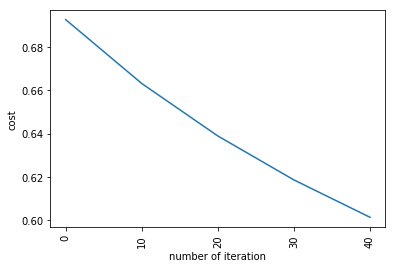

test accuracy: 78.70662460567823 %


In [10]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iteration):
     dimension = x_train.shape[0]
     w,b = intialize_weight_and_bias(dimension)
     parameters, gradients, cost_list = update(w,b,x_train,y_train,learning_rate,num_iteration)
     y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
     print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iteration = 50) 

Instead of using the code we write sklearn library we can find what we want values.

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

test accuracy 0.9700315457413249


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**CONCLUSION**
If you have any suggestion, question or comment, I will be happy to hear it.